In [17]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
# X = iris.data[:, (2, 3)]
# y = (iris.target == 0).astype(np.int)
X = iris.data
y = iris.target.astype(np.int)

/var/folders/sw/q7k30xcj51x3tc06z506z3n00000gn/T/ipykernel_38010/1796832042.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = iris.target.astype(np.int)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

per_clf = Perceptron()
per_clf.fit(X_train, y_train)

Perceptron()

In [19]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, per_clf.predict(X_test)))

[[15  0  0]
 [ 1 10  1]
 [ 0  1 10]]


In [2]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist.load_data()
print(X_train_full.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


In [4]:
X_val, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_val, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = [
  'T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle, boot',
]

In [38]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=(28, 28)))
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

# or

model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.Dense(50, activation='relu'),
  keras.layers.Dense(20, activation='relu'),
  keras.layers.Dense(10, activation='softmax'),
])

In [39]:
print(model.summary())
print(model.layers)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 20)                1020      
                                                                 
 dense_19 (Dense)            (None, 10)                210       
                                                                 
Total params: 84,780
Trainable params: 84,780
Non-trainable params: 0
_________________________________________________________________
None
[<keras.layers.reshaping.flatten.Flatten obje

In [40]:
weights, biases = model.layers[2].get_weights()
print(weights.shape, biases.shape)

(100, 50) (50,)


In [41]:
model.compile(
  loss=keras.losses.sparse_categorical_crossentropy,
  optimizer=keras.optimizers.SGD(learning_rate=0.01),
  metrics=['accuracy'],
)

In [42]:
history = model.fit(X_train, y_train, epochs=64, validation_data=(X_val, y_val))
print(history.params)

Epoch 1/64
1719/1719 [==============================] - 1s 734us/step - loss: 0.8355 - accuracy: 0.7116 - val_loss: 0.5354 - val_accuracy: 0.8130
Epoch 2/64
1719/1719 [==============================] - 1s 655us/step - loss: 0.5073 - accuracy: 0.8222 - val_loss: 0.4972 - val_accuracy: 0.8232
Epoch 3/64
1719/1719 [==============================] - 1s 753us/step - loss: 0.4550 - accuracy: 0.8401 - val_loss: 0.4745 - val_accuracy: 0.8360
Epoch 4/64
1719/1719 [==============================] - 1s 683us/step - loss: 0.4256 - accuracy: 0.8499 - val_loss: 0.4131 - val_accuracy: 0.8522
Epoch 5/64
1719/1719 [==============================] - 1s 704us/step - loss: 0.4037 - accuracy: 0.8563 - val_loss: 0.4098 - val_accuracy: 0.8512
Epoch 6/64
1719/1719 [==============================] - 1s 684us/step - loss: 0.3856 - accuracy: 0.8629 - val_loss: 0.3720 - val_accuracy: 0.8688
Epoch 7/64
1719/1719 [==============================] - 1s 692us/step - loss: 0.3709 - accuracy: 0.8676 - val_loss: 0.3649 -

In [43]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

pred = np.argmax(model.predict(X_test_full), axis=1)
print(confusion_matrix(y_test_full, pred))
print(accuracy_score(y_test_full, pred))

313/313 [==============================] - 0s 405us/step
[[858   6   9  16   4   1  79   0  27   0]
 [  0 978   1  13   1   0   3   0   4   0]
 [ 31   8 634   4 241   1  55   0  26   0]
 [ 31  22  21 804  74   2  28   0  17   1]
 [  1   1  24  13 924   0  22   0  15   0]
 [  2   0   0   0   1 938   0  14   6  39]
 [165   4  54  20 216   0 501   1  39   0]
 [  1   0   0   0   0  54   0 894   9  42]
 [  5   0   4   1   0   2   2   2 983   1]
 [  1   0   0   0   0   6   0  24   0 969]]
0.8483


313/313 [==============================] - 0s 416us/step
Sandal
Sneaker
Pullover
Coat
Sandal
Ankle, boot
Shirt
Dress
T-shirt/top
Shirt
Shirt
Dress
Coat
Shirt
Coat
Dress
Sneaker
Ankle, boot
Bag
Pullover
Coat
Pullover
T-shirt/top
Shirt
Pullover
Coat
Bag
T-shirt/top
Coat
Shirt
Shirt
T-shirt/top
Coat
Shirt
Dress
Coat
Dress
Coat
Shirt
T-shirt/top
Ankle, boot
Sneaker
Coat
Pullover
Dress
Trouser
Coat
Shirt
Coat
Shirt
Coat
Pullover
Bag
Sandal
Dress
Pullover
Sandal
Sneaker
Pullover
Coat
Coat
Shirt
Coat
Pullover
Pullover
Shirt
Coat
Shirt
T-shirt/top
Pullover
T-shirt/top
Shirt
Coat
Pullover
Bag
Dress
Shirt
Dress
Pullover
Shirt
Coat
Shirt
T-shirt/top
Shirt
Coat
Dress
Coat
Pullover
Coat
Dress
Bag
Shirt
Sandal
Pullover
Sneaker
Ankle, boot
Shirt
Coat
Coat
Pullover
T-shirt/top
Shirt
T-shirt/top
Shirt
Shirt
Pullover
Bag
Pullover
Shirt
T-shirt/top
Shirt
Pullover
Shirt
T-shirt/top
T-shirt/top
Pullover
Bag
Shirt
Coat
Pullover
Shirt
Coat
Pullover
Shirt
T-shirt/top
Shirt
Shirt
T-shirt/top
T-shirt/top
Pullov

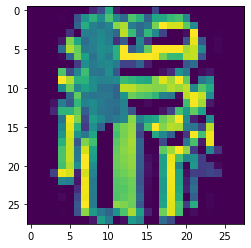

In [90]:
import matplotlib.pyplot as plt

pred = np.argmax(model.predict(X_test_full), axis=1)

for i in range(len(X_test_full)):
  if pred[i] != y_test_full[i]:
    print(class_names[pred[i]])
    print(class_names[y_test_full[i]])
    plt.imshow(X_test_full[i])

In [96]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [102]:
model = keras.Sequential([
  keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
  keras.layers.Dense(1),
])
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD(0.01))
history = model.fit(X_train, y_train, epochs=64, validation_data=(X_val, y_val))
print(model.evaluate(X_test, y_test))

Epoch 1/64
363/363 [==============================] - 0s 653us/step - loss: 0.8489 - val_loss: 0.5731
Epoch 2/64
363/363 [==============================] - 0s 467us/step - loss: 1.3695 - val_loss: 0.4378
Epoch 3/64
363/363 [==============================] - 0s 507us/step - loss: 0.4995 - val_loss: 0.4010
Epoch 4/64
363/363 [==============================] - 0s 555us/step - loss: 0.4248 - val_loss: 0.3853
Epoch 5/64
363/363 [==============================] - 0s 478us/step - loss: 0.4064 - val_loss: 0.3698
Epoch 6/64
363/363 [==============================] - 0s 480us/step - loss: 0.3956 - val_loss: 0.3695
Epoch 7/64
363/363 [==============================] - 0s 542us/step - loss: 0.3894 - val_loss: 0.3587
Epoch 8/64
363/363 [==============================] - 0s 479us/step - loss: 0.3858 - val_loss: 0.3558
Epoch 9/64
363/363 [==============================] - 0s 466us/step - loss: 0.3784 - val_loss: 0.3520
Epoch 10/64
363/363 [==============================] - 0s 477us/step - loss: 0.375

In [109]:
pred = model.predict(X_test)
print(y_test, pred)

162/162 [==============================] - 0s 304us/step
[3.964 1.869 1.676 ... 1.087 1.232 2.725] [[3.817144 ]
 [3.3610525]
 [1.9695238]
 ...
 [1.0668554]
 [1.3867844]
 [2.4804306]]


In [126]:
# Wide and deep network
input_ = keras.layers.Input(shape=X_train_full.shape[1:])
hidden1 = keras.layers.Dense(60, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
hidden3 = keras.layers.Dense(10, activation='relu')(hidden2)
concat = keras.layers.Concatenate()([input_, hidden3])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD(0.005))
print(model.summary())

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_50 (Dense)               (None, 60)           540         ['input_8[0][0]']                
                                                                                                  
 dense_51 (Dense)               (None, 30)           1830        ['dense_50[0][0]']               
                                                                                                  
 dense_52 (Dense)               (None, 10)           310         ['dense_51[0][0]']               
                                                                                            

In [128]:
history = model.fit(X_train, y_train, epochs=128, validation_data=(X_val, y_val))
print(model.evaluate(X_test, y_test))

Epoch 1/128
363/363 [==============================] - 0s 564us/step - loss: 0.2885 - val_loss: 0.2904
Epoch 2/128
363/363 [==============================] - 0s 527us/step - loss: 0.2910 - val_loss: 0.2839
Epoch 3/128
363/363 [==============================] - 0s 548us/step - loss: 0.2913 - val_loss: 0.2807
Epoch 4/128
363/363 [==============================] - 0s 527us/step - loss: 0.2859 - val_loss: 0.2804
Epoch 5/128
363/363 [==============================] - 0s 504us/step - loss: 0.2842 - val_loss: 0.2853
Epoch 6/128
363/363 [==============================] - 0s 503us/step - loss: 0.2874 - val_loss: 0.2833
Epoch 7/128
363/363 [==============================] - 0s 500us/step - loss: 0.2884 - val_loss: 0.2800
Epoch 8/128
363/363 [==============================] - 0s 525us/step - loss: 0.2860 - val_loss: 0.2990
Epoch 9/128
363/363 [==============================] - 0s 525us/step - loss: 0.2865 - val_loss: 0.2869
Epoch 10/128
363/363 [==============================] - 0s 555us/step - l

In [130]:
print(model.evaluate(X_test, y_test))
print(model.predict(X_test), y_test)

162/162 [==============================] - 0s 372us/step - loss: 0.2893
0.28929993510246277
162/162 [==============================] - 0s 336us/step
[[3.989099 ]
 [3.182486 ]
 [2.1702776]
 ...
 [1.1236055]
 [1.7190018]
 [2.9968128]] [3.964 1.869 1.676 ... 1.087 1.232 2.725]


In [156]:
input_wide = keras.layers.Input(shape=(4), name='input_wide')
input_deep = keras.layers.Input(shape=(4), name='input_deep')
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_wide, hidden2])
output1 = keras.layers.Dense(1, name='output1')(concat)
output2 = keras.layers.Dense(1, name='output2')(hidden2)
model = keras.Model(inputs=[input_wide, input_deep], outputs=[output1, output2])

model.compile(
  loss=[keras.losses.mean_squared_error, keras.losses.mean_squared_error],
  loss_weights=(0.5, 0.5),
  optimizer=keras.optimizers.SGD(0.01),
  )
print(model.summary())

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_deep (InputLayer)        [(None, 4)]          0           []                               
                                                                                                  
 dense_75 (Dense)               (None, 30)           150         ['input_deep[0][0]']             
                                                                                                  
 input_wide (InputLayer)        [(None, 4)]          0           []                               
                                                                                                  
 dense_76 (Dense)               (None, 30)           930         ['dense_75[0][0]']               
                                                                                           

In [157]:
history = model.fit((X_train[:, :4], X_train[:, 4:]), (y_train, y_train), epochs=128, validation_data=((X_val[:, :4], X_val[:, 4:]), y_val))
print(model.evaluate((X_test[:, :4], X_test[:, 4:], ), (y_test, y_test)))

Epoch 1/128
363/363 [==============================] - 1s 2ms/step - loss: 1.1840 - output1_loss: 0.9193 - output2_loss: 1.4487 - val_loss: 0.6747 - val_output1_loss: 0.4625 - val_output2_loss: 0.8869
Epoch 2/128
363/363 [==============================] - 0s 611us/step - loss: 0.7132 - output1_loss: 0.5042 - output2_loss: 0.9222 - val_loss: 0.6330 - val_output1_loss: 0.4251 - val_output2_loss: 0.8409
Epoch 3/128
363/363 [==============================] - 0s 624us/step - loss: 0.6708 - output1_loss: 0.4644 - output2_loss: 0.8772 - val_loss: 0.6069 - val_output1_loss: 0.4040 - val_output2_loss: 0.8097
Epoch 4/128
363/363 [==============================] - 0s 586us/step - loss: 0.6673 - output1_loss: 0.4593 - output2_loss: 0.8754 - val_loss: 0.6033 - val_output1_loss: 0.4003 - val_output2_loss: 0.8062
Epoch 5/128
363/363 [==============================] - 0s 577us/step - loss: 0.6485 - output1_loss: 0.4426 - output2_loss: 0.8544 - val_loss: 0.5932 - val_output1_loss: 0.3911 - val_output2_

In [158]:
pred1, pred2 = model.predict((X_test[:, :4], X_test[:, 4:]))
print(pred1.reshape(1, -1).ravel())
print(pred2.reshape(1, -1).ravel())
print(y_test)

162/162 [==============================] - 0s 394us/step
[3.6428246 2.7640448 1.921495  ... 0.9335916 1.1911012 2.4535055]
[3.5213852 2.4069636 2.1003957 ... 1.6615747 1.3980312 2.7683866]
[3.964 1.869 1.676 ... 1.087 1.232 2.725]


In [166]:
# Not sure why this doesn't work

class WideAndDeep(keras.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.output1 = keras.layers.Dense(1, name='output1')
    self.output2 = keras.layers.Dense(1, name='output2')
  
  def call(self, inputs):
    input1, input2 = inputs
    hidden1 = self.hidden1(input2)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.Concatenate(input1, hidden2)
    output1 = keras.Dense(1)(concat)
    output2 = keras.Dense(1)(hidden2)
    return output1, output2

model = WideAndDeep()
model.compile(optimizer=keras.optimizers.SGD(0.01), loss=('mse', 'mse'), loss_weights=(0.75, 0.25))

history = model.fit((X_train[:, :4], X_train[:, 4:]), (y_train, y_train), epochs=128, validation_data=((X_val[:, :4], X_val[:, 4:]), y_val))
print(model.evaluate((X_test[:, :4], X_test[:, 4:], ), (y_test, y_test)))

Epoch 1/128


TypeError: in user code:

    File "/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/var/folders/sw/q7k30xcj51x3tc06z506z3n00000gn/T/__autograph_generated_filet77404tk.py", line 13, in tf__call
        concat = ag__.converted_call(ag__.ld(keras).layers.Concatenate, (ag__.ld(input1), ag__.ld(hidden2)), None, fscope)

    TypeError: Exception encountered when calling layer "wide_and_deep_7" "                 f"(type WideAndDeep).
    
    in user code:
    
        File "/var/folders/sw/q7k30xcj51x3tc06z506z3n00000gn/T/ipykernel_42341/644067800.py", line 13, in call  *
            concat = keras.layers.Concatenate(input1, hidden2)
    
        TypeError: Concatenate.__init__() takes from 1 to 2 positional arguments but 3 were given
    
    
    Call arguments received by layer "wide_and_deep_7" "                 f"(type WideAndDeep):
      • inputs=('tf.Tensor(shape=(None, 4), dtype=float32)', 'tf.Tensor(shape=(None, 4), dtype=float32)')


In [168]:
input_wide = keras.layers.Input(shape=(4), name='input_wide')
input_deep = keras.layers.Input(shape=(4), name='input_deep')
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_wide, hidden2])
output1 = keras.layers.Dense(1, name='output1')(concat)
output2 = keras.layers.Dense(1, name='output2')(hidden2)
model = keras.Model(inputs=[input_wide, input_deep], outputs=[output1, output2])

model.compile(
  loss=[keras.losses.mean_squared_error, keras.losses.mean_squared_error],
  loss_weights=(0.5, 0.5),
  optimizer=keras.optimizers.SGD(0.01),
)

save_on_epoch_cb = keras.callbacks.ModelCheckpoint('wide_and_deep.h5', save_best_only=True)

history = model.fit((X_train[:, :4], X_train[:, 4:]), (y_train, y_train), epochs=128, validation_data=((X_val[:, :4], X_val[:, 4:]), y_val), callbacks=(save_on_epoch_cb))
print(model.evaluate((X_test[:, :4], X_test[:, 4:], ), (y_test, y_test)))

best_model = keras.models.load_model('wide_and_deep.h5')

Epoch 1/128
363/363 [==============================] - 1s 859us/step - loss: 1.4756 - output1_loss: 1.2391 - output2_loss: 1.7121 - val_loss: 0.8177 - val_output1_loss: 0.5835 - val_output2_loss: 1.0518
Epoch 2/128
363/363 [==============================] - 0s 584us/step - loss: 0.7962 - output1_loss: 0.5720 - output2_loss: 1.0203 - val_loss: 0.6638 - val_output1_loss: 0.4546 - val_output2_loss: 0.8730
Epoch 3/128
363/363 [==============================] - 0s 581us/step - loss: 0.6816 - output1_loss: 0.4750 - output2_loss: 0.8883 - val_loss: 0.6199 - val_output1_loss: 0.4125 - val_output2_loss: 0.8273
Epoch 4/128
363/363 [==============================] - 0s 573us/step - loss: 0.6527 - output1_loss: 0.4488 - output2_loss: 0.8566 - val_loss: 0.6200 - val_output1_loss: 0.4067 - val_output2_loss: 0.8333
Epoch 5/128
363/363 [==============================] - 0s 580us/step - loss: 0.6413 - output1_loss: 0.4380 - output2_loss: 0.8447 - val_loss: 0.6028 - val_output1_loss: 0.3955 - val_output

In [171]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

class CustomCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print("\nval/train: {:2f}".format(logs['val_loss'] / logs['loss']))

history = model.fit((X_train[:, :4], X_train[:, 4:]), (y_train, y_train), epochs=256, validation_data=((X_val[:, :4], X_val[:, 4:]), y_val), callbacks=(save_on_epoch_cb, early_stopping_cb, CustomCallback()))

Epoch 1/256
320/363 [=========================>....] - ETA: 0s - loss: 0.4668 - output1_loss: 0.3246 - output2_loss: 0.6090
val/train: 0.974887
363/363 [==============================] - 0s 683us/step - loss: 0.4620 - output1_loss: 0.3199 - output2_loss: 0.6041 - val_loss: 0.4504 - val_output1_loss: 0.3006 - val_output2_loss: 0.6003
Epoch 2/256
348/363 [===========================>..] - ETA: 0s - loss: 0.4651 - output1_loss: 0.3221 - output2_loss: 0.6082
val/train: 0.968711
363/363 [==============================] - 0s 585us/step - loss: 0.4634 - output1_loss: 0.3207 - output2_loss: 0.6061 - val_loss: 0.4489 - val_output1_loss: 0.3006 - val_output2_loss: 0.5971
Epoch 3/256
338/363 [==========================>...] - ETA: 0s - loss: 0.4613 - output1_loss: 0.3197 - output2_loss: 0.6029
val/train: 0.959714
363/363 [==============================] - 0s 616us/step - loss: 0.4616 - output1_loss: 0.3198 - output2_loss: 0.6033 - val_loss: 0.4430 - val_output1_loss: 0.2979 - val_output2_loss: 0.

In [181]:
import os, time

log_dir = os.path.join(os.curdir, 'logs')

def get_run_log_dir():
  run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
  return os.path.join(log_dir, run_id)

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
output = keras.layers.Dense(1)(hidden2)

model = keras.Model(inputs=(input_), outputs=(output))
model.compile(optimizer=keras.optimizers.SGD(0.005), loss='mse')

run_log_dir = get_run_log_dir()
tensorboard_cb = keras.callbacks.TensorBoard(run_log_dir)
history = model.fit(X_train, y_train, epochs=256, validation_data=(X_val, y_val), callbacks=(tensorboard_cb))

Epoch 1/256
363/363 [==============================] - 0s 694us/step - loss: 0.8833 - val_loss: 0.5690
Epoch 2/256
363/363 [==============================] - 0s 1ms/step - loss: 0.5644 - val_loss: 0.4652
Epoch 3/256
363/363 [==============================] - 0s 1ms/step - loss: 0.4845 - val_loss: 0.4277
Epoch 4/256
363/363 [==============================] - 0s 935us/step - loss: 0.4539 - val_loss: 0.4040
Epoch 5/256
363/363 [==============================] - 0s 953us/step - loss: 0.4315 - val_loss: 0.3891
Epoch 6/256
363/363 [==============================] - 0s 663us/step - loss: 0.4244 - val_loss: 0.3795
Epoch 7/256
363/363 [==============================] - 0s 638us/step - loss: 0.4093 - val_loss: 0.3672
Epoch 8/256
363/363 [==============================] - 0s 528us/step - loss: 0.3963 - val_loss: 0.3636
Epoch 9/256
363/363 [==============================] - 0s 529us/step - loss: 0.3892 - val_loss: 0.3579
Epoch 10/256
363/363 [==============================] - 0s 532us/step - loss:

In [192]:
# fine tuning

def build_model(n_hidden=1, n_nodes=30, lr=0.005, input_shape=(8), output_nodes=1, output_activation=keras.activations.linear, loss='mse'):
  model = keras.models.Sequential()
  model.add(keras.layers.Input(shape=input_shape))
  for _ in range(n_hidden):
    model.add(keras.layers.Dense(n_nodes, activation='relu'))
  model.add(keras.layers.Dense(output_nodes, activation=output_activation))
  model.compile(optimizer=keras.optimizers.SGD(lr), loss=loss)
  return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/var/folders/sw/q7k30xcj51x3tc06z506z3n00000gn/T/ipykernel_42341/401080360.py:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [201]:
from sklearn.model_selection import RandomizedSearchCV

params = {
  'n_hidden': [6, 7, 8, 9],
  'n_nodes': range(40, 61),
  'lr': np.linspace(0.01, 0.05, 100),
}

rndcv = RandomizedSearchCV(keras_reg, param_distributions=params, n_iter=15, cv=3)
rndcv.fit(X_train, y_train, epochs=128, validation_data=(X_val, y_val), callbacks=(keras.callbacks.EarlyStopping(patience=10)))
print(rndcv.best_params_)

Epoch 1/128
242/242 [==============================] - 0s 1ms/step - loss: 0.7755 - val_loss: 0.4897
Epoch 2/128
242/242 [==============================] - 0s 767us/step - loss: 0.4518 - val_loss: 0.3668
Epoch 3/128
242/242 [==============================] - 0s 675us/step - loss: 0.4114 - val_loss: 0.3680
Epoch 4/128
242/242 [==============================] - 0s 659us/step - loss: 0.3880 - val_loss: 0.3415
Epoch 5/128
242/242 [==============================] - 0s 877us/step - loss: 0.3751 - val_loss: 0.3548
Epoch 6/128
242/242 [==============================] - 0s 767us/step - loss: 0.3510 - val_loss: 0.3378
Epoch 7/128
242/242 [==============================] - 0s 683us/step - loss: 0.3511 - val_loss: 0.3311
Epoch 8/128
242/242 [==============================] - 0s 740us/step - loss: 0.3446 - val_loss: 0.3116
Epoch 9/128
242/242 [==============================] - 0s 705us/step - loss: 0.3374 - val_loss: 0.3216
Epoch 10/128
242/242 [==============================] - 0s 668us/step - los

/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:953: UserWarning: One or more of the test scores are non-finite: [-0.30633252 -0.30936119 -0.36884068 -0.30155578 -0.32397479 -0.32171959
 -0.32347036         nan -0.32172443 -0.33385044 -0.3000675  -0.31264895
 -0.33004927 -0.31747373 -0.30430953]
  warnings.warn(


363/363 [==============================] - 0s 797us/step - loss: 0.6503 - val_loss: 0.4955
Epoch 2/128
363/363 [==============================] - 0s 575us/step - loss: 0.4314 - val_loss: 0.3672
Epoch 3/128
363/363 [==============================] - 0s 575us/step - loss: 0.3926 - val_loss: 0.3393
Epoch 4/128
363/363 [==============================] - 0s 572us/step - loss: 0.3784 - val_loss: 0.4834
Epoch 5/128
363/363 [==============================] - 0s 579us/step - loss: 0.3743 - val_loss: 0.3284
Epoch 6/128
363/363 [==============================] - 0s 568us/step - loss: 0.3510 - val_loss: 0.3473
Epoch 7/128
363/363 [==============================] - 0s 574us/step - loss: 0.3492 - val_loss: 0.3080
Epoch 8/128
363/363 [==============================] - 0s 573us/step - loss: 0.3399 - val_loss: 0.3123
Epoch 9/128
363/363 [==============================] - 0s 584us/step - loss: 0.3333 - val_loss: 0.3418
Epoch 10/128
363/363 [==============================] - 0s 578us/step - loss: 0.3240 

In [204]:
best = build_model(**rndcv.best_params_)
best.fit(X_train, y_train, epochs=128, validation_data=(X_val, y_val), callbacks=(keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)))
print(best.evaluate(X_test, y_test))


Epoch 1/128
363/363 [==============================] - 1s 830us/step - loss: 0.6486 - val_loss: 0.4374
Epoch 2/128
363/363 [==============================] - 0s 590us/step - loss: 0.4429 - val_loss: 1.0706
Epoch 3/128
363/363 [==============================] - 0s 619us/step - loss: 0.4074 - val_loss: 0.3556
Epoch 4/128
363/363 [==============================] - 0s 596us/step - loss: 0.3863 - val_loss: 0.3925
Epoch 5/128
363/363 [==============================] - 0s 588us/step - loss: 0.3682 - val_loss: 0.3120
Epoch 6/128
363/363 [==============================] - 0s 580us/step - loss: 0.3522 - val_loss: 0.3263
Epoch 7/128
363/363 [==============================] - 0s 594us/step - loss: 0.3551 - val_loss: 0.3721
Epoch 8/128
363/363 [==============================] - 0s 628us/step - loss: 0.3395 - val_loss: 0.2911
Epoch 9/128
363/363 [==============================] - 0s 599us/step - loss: 0.3401 - val_loss: 0.2927
Epoch 10/128
363/363 [==============================] - 0s 595us/step - l

In [205]:
pred = model.predict(X_test)
print(y_test)
print(pred.reshape(1, -1).ravel())

162/162 [==============================] - 0s 326us/step
[3.964 1.869 1.676 ... 1.087 1.232 2.725]
[4.081619  3.19416   1.909896  ... 1.105144  1.9045583 2.71219  ]


In [481]:
# exercise

import os
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

preprocess = Pipeline([
  ('flatten', FunctionTransformer(lambda X: X.reshape(len(X), -1))),
  ('scaler', StandardScaler()),
])

# (X_train_raw_full, y_train_full), (X_test_raw, y_test) = keras.datasets.mnist.load_data()
(X_train_raw_full, y_train_full), (X_test_raw, y_test) = fashion_mnist = keras.datasets.fashion_mnist.load_data()
X_train_full = preprocess.fit_transform(X_train_raw_full)
X_test = preprocess.fit_transform(X_test_raw)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)
print(X_train.shape, y_train.shape)

(45000, 784) (45000,)


In [482]:
import os

save_dir = os.path.join(os.curdir, 'MNIST.h5')
log_dir = os.path.join(os.curdir, 'logs')

def get_run_log_dir():
  run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
  return os.path.join(log_dir, run_id)

def build_model(n_hidden=1, n_nodes=30, lr=0.005, input_shape=(28, 28), output_nodes=10, output_activation='softmax', loss=keras.losses.categorical_crossentropy, metrics=['accuracy']):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=input_shape))
  for _ in range(n_hidden):
    model.add(keras.layers.Dense(n_nodes, activation='selu', kernel_initializer='lecun_normal'))
  model.add(keras.layers.Dense(output_nodes, activation=output_activation))
  model.compile(optimizer=keras.optimizers.SGD(lr), loss=loss, metrics=metrics)
  return model

keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)


/var/folders/sw/q7k30xcj51x3tc06z506z3n00000gn/T/ipykernel_42341/3891158908.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)


In [483]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# params = {
#   'n_hidden': [x for x in range(1, 3)],
#   'n_nodes': [x for x in range(15, 25)],
#   'lr': np.linspace(0.025, 0.05, 100),
#   'input_shape': X_test_scaled.shape[1:],
# }

# randcv = RandomizedSearchCV(keras_clf, param_distributions=params, cv=3, n_iter=10)
# randcv.fit(X_train_scaled, y_train, epochs=256, validation_data=(X_val_scaled, y_val), callbacks=[
#   keras.callbacks.TensorBoard(get_run_log_dir()),
#   keras.callbacks.ModelCheckpoint(save_dir, save_best_only=True),
#   keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
# ])
# print(randcv.best_params_)


model = build_model(5, 800, 0.01, X_test.shape[1:], 10, 'softmax', loss=keras.losses.sparse_categorical_crossentropy, metrics=[keras.metrics.sparse_categorical_accuracy])
model.fit(X_train, y_train, epochs=256, validation_data=(X_val, y_val), callbacks=[
  keras.callbacks.TensorBoard(get_run_log_dir()),
  keras.callbacks.ModelCheckpoint(save_dir, save_best_only=True),
  keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
])

Epoch 1/256
1407/1407 [==============================] - 13s 9ms/step - loss: 0.5656 - sparse_categorical_accuracy: 0.8151 - val_loss: 0.5043 - val_sparse_categorical_accuracy: 0.8289
Epoch 2/256
1407/1407 [==============================] - 12s 8ms/step - loss: 0.3686 - sparse_categorical_accuracy: 0.8682 - val_loss: 0.5767 - val_sparse_categorical_accuracy: 0.8135
Epoch 3/256
1407/1407 [==============================] - 12s 8ms/step - loss: 0.3184 - sparse_categorical_accuracy: 0.8843 - val_loss: 0.5007 - val_sparse_categorical_accuracy: 0.8297
Epoch 4/256
1407/1407 [==============================] - 12s 8ms/step - loss: 0.2803 - sparse_categorical_accuracy: 0.8977 - val_loss: 0.3833 - val_sparse_categorical_accuracy: 0.8661
Epoch 5/256
1407/1407 [==============================] - 12s 9ms/step - loss: 0.2546 - sparse_categorical_accuracy: 0.9063 - val_loss: 0.6503 - val_sparse_categorical_accuracy: 0.8184
Epoch 6/256
 517/1407 [==========>...................] - ETA: 6s - loss: 0.2225 

KeyboardInterrupt: 

313/313 [==============================] - 1s 2ms/step
7 7
[[ 966    0    1    1    0    3    4    2    2    1]
 [   0 1124    4    1    0    1    2    1    2    0]
 [   5    2  999    9    2    0    3    5    7    0]
 [   0    1    3  986    1    5    0    4    4    6]
 [   0    0    8    1  951    1    5    3    1   12]
 [   2    1    0   14    2  857    5    3    6    2]
 [   7    2    1    1    4    7  934    0    2    0]
 [   0    7    9    3    2    1    0  992    3   11]
 [   2    2    2   10    7   12    4    5  926    4]
 [   3    4    1    8   14    3    1    8    2  965]]
0.97


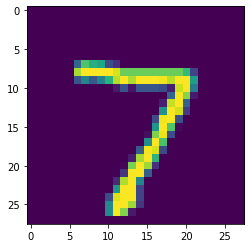

In [480]:
loaded = keras.models.load_model(save_dir)
pred = loaded.predict(X_test)
i = 0
plt.imshow(X_test_raw[i])
print(np.argmax(pred[i]), y_test[i])
print(confusion_matrix(y_test, np.argmax(pred, axis=1)))
print(accuracy_score(y_test, np.argmax(pred, axis=1)))